<a href="https://colab.research.google.com/github/bikumalla/Tensorflow_Deeplearning/blob/main/Regression_Analysis_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.7.0


# Regression Analysis
Basically it is predicting a contineous number based on the features that are available to analize

**Examples**

- Predict the selling price of houses given information about them (such as number of rooms, size, number of bathrooms).
- Predict the coordinates of a bounding box of an item in an image.
- Predict the cost of medical insurance for an individual given their demographics (age, sex, gender, race).

## Scrating this book with following :
 we're going to go through doing the following with TensorFlow:
- Architecture of a regression model
- Input shapes and output shapes
  - `X`: features/data (inputs)
  - `y`: labels (outputs)
- Creating custom data to view and fit
- Steps in modelling
  - Creating a model
  - Compiling a model
    - Defining a loss function
    - Setting up an optimizer
    - Creating evaluation metrics
  - Fitting a model (getting it to find patterns in our data)
- Evaluating a model
  - Visualizng the model ("visualize, visualize, visualize")
  - Looking at training curves
  - Compare predictions to ground truth (using our evaluation metrics)
- Saving a model (so we can use it later)
- Loading a model


| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

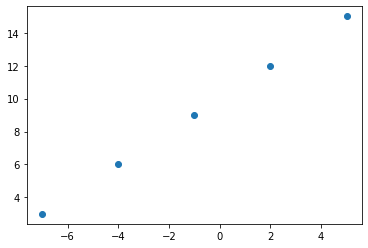

In [2]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0,-4.0,-1.0,2.0,5.0])
y = np.array([3.0,6.0,9.0,12.0,15.0])

plt.scatter(X,y)

Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

The input shape is the shape of your data that goes into the model.

The output shape is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [3]:
house_info = tf.constant(['Bedrooms','Bathrooms','garage'])
house_price = tf.constant([945350])
house_info,house_price


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'Bedrooms', b'Bathrooms', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([945350], dtype=int32)>)

In [4]:
house_price.shape

TensorShape([1])

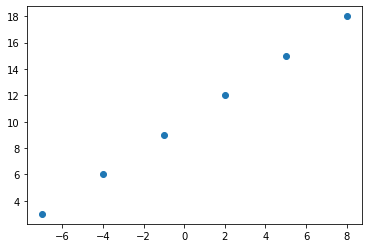

In [5]:
X = tf.constant([-7.0,-4.0,-1.0,2.0,5.0,8.0])
y = tf.constant([3.0,6.0,9.0,12.0,15.0,18.0])

plt.scatter(X,y)

In [6]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

In [7]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In [8]:
y.ndim

1

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

In [9]:
# setting the random seed

tf.random.set_seed(42)

# Building the model 

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])

# Compiling a model

model.compile(loss = tf.keras.losses.mae, # mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # Stochastic Gradiant descent
              metrics=["mae"])

# Fitting a model

model.fit(tf.expand_dims(X,axis=-1),y,epochs=5) # In tf 2.7.0 we need to expand the dims for input

Epoch 1/5
1/1 [==============================] - 1s 908ms/step - loss: 10.2150 - mae: 10.2150
Epoch 2/5
1/1 [==============================] - 0s 17ms/step - loss: 10.2025 - mae: 10.2025
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 10.1900 - mae: 10.1900
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.1775 - mae: 10.1775
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 10.1650 - mae: 10.1650


In [10]:
X,y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [11]:
model.predict([17.0])

array([[10.1660185]], dtype=float32)

## Improving a model

How do you think you'd improve upon our current model?

If you guessed by tweaking some of the things we did above, you'd be correct.

To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the **learning rate** of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).


In [12]:
# Setting the seed
tf.random.set_seed(42)

#Building the model 

model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
                               ])
# Compiling a model

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model

model_1.fit(tf.expand_dims(X,axis = -1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 329ms/step - loss: 10.2150 - mae: 10.2150
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 10.2025 - mae: 10.2025
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1900 - mae: 10.1900
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1775 - mae: 10.1775
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1650 - mae: 10.1650
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1525 - mae: 10.1525
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.1400 - mae: 10.1400
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1275 - mae: 10.1275
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1150 - mae: 10.1150
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1025 - mae: 10.1025
Epoch 11/100
1/1 [==============================] - 0s 9

In [13]:
model_1.predict([17.0])

array([[19.19101]], dtype=float32)

In [14]:
X,y

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8.], dtype=float32)>,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18.], dtype=float32)>)

In [15]:
# Lets build a bigger dataset

X = np.arange(-100,100,4)

y = np.arange(-90,100,4)

X,y

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98]))

In [16]:
Y = X+10
Y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

## Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:
* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our `X` and `y` arrays.

# > 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it **generalizes** to unseen examples.

In [17]:
len(X)

50

In [18]:
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]

X_train,Y_train,X_test,Y_test

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66]),
 array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96]),
 array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]))

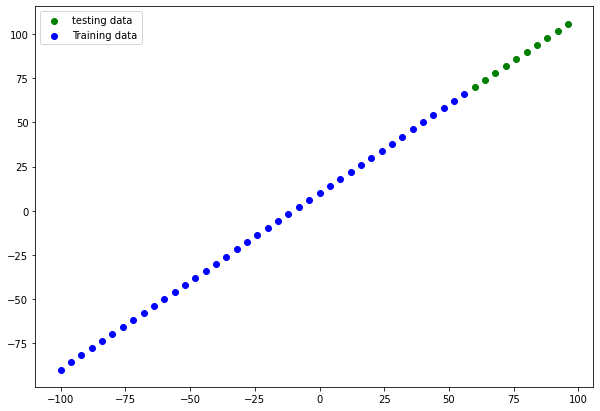

In [19]:
plt.figure(figsize = (10,7))

plt.scatter(X_test,Y_test,c='g',label ='testing data')

plt.scatter(X_train,Y_train,c= 'b',label = 'Training data')

plt.legend();

In [20]:
# set random seed
tf.random.set_seed(42)

# Building a model

model_2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
                             ])
# Compiling the model

model_2.compile( loss = tf.keras.losses.mae ,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


# Fitting the model 

model_2.fit(tf.expand_dims(X_train,axis = -1),Y_train ,epochs = 5)


Epoch 1/5
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/5
2/2 [==============================] - 0s 3ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/5
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/5
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/5
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677


In [21]:
Yhats = model_2.predict(X_test)

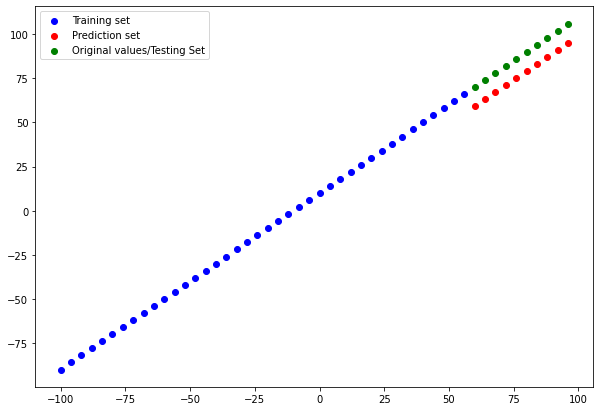

In [22]:
plt.figure(figsize = (10,7))

# plot the training set
plt.scatter(X_train,Y_train,c = 'b',label = 'Training set')

#plotting the prediction set
plt.scatter(X_test,Yhats,c = 'r',label = 'Prediction set')

#plotting the original set
plt.scatter(X_test,Y_test,c = 'g', label = 'Original values/Testing Set')

# displaying legends
plt.legend()

In [23]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Lets make a 2D plot using plot model tecnique

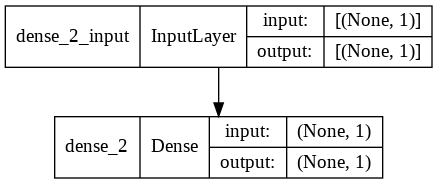

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model_2,show_shapes = True)

## Evaluating predictions

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use [`model.evaluate()`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate) which will return the loss of the model as well as any metrics setup during the compile step.

In [25]:
model_2.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 140ms/step - loss: 10.7109 - mae: 10.7109


[10.710948944091797, 10.710948944091797]

In [26]:
mae = tf.metrics.MAE(y_true = Y_test,y_pred = Yhats)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([28.532028, 24.571789, 20.61155 , 16.921045, 14.014643, 11.892331,
       10.554118, 10.      , 10.229978, 11.244052], dtype=float32)>

In [27]:
Y_test.shape,Yhats.shape
Y_test,Yhats

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]), array([[59.46797 ],
        [63.42821 ],
        [67.38845 ],
        [71.348694],
        [75.30893 ],
        [79.26917 ],
        [83.22941 ],
        [87.18965 ],
        [91.14989 ],
        [95.11013 ]], dtype=float32))

In [28]:
Yhats.squeeze().shape

(10,)

In [29]:
mae = tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=Yhats.squeeze())
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.710949>

In [30]:
mse = tf.metrics.mean_squared_error(y_true= Y_test,y_pred =  Yhats.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=114.73747>

In [31]:
tf.reduce_mean(tf.abs(Y_test-Yhats.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=10.710949325561524>

 we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [32]:
#setting seed
tf.random.set_seed(42)

# Building the model with 1 layer
model_7 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
]
)

# Compiling the model 

model_7.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fitting the model and expand dims to X_test for tf 2.7.0

model_7.fit(tf.expand_dims(X_train,axis = -1),Y_train,epochs = 100 ,verbose = 0)

In [33]:
#set random seed
tf.random.set_seed(42)

# Building model 8 with 2 layers and 100 neurons

model_8 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1),
                               
]) 

# Compiling the model

model_8.compile( loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# fitting the model 

model_8.fit(tf.expand_dims(X_train,axis = -1),Y_train,epochs = 100)



Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 12ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 5ms/s

In [34]:
Yhats_1 = model_7.predict(X_test)
Yhats_2 = model_8.predict(X_test)



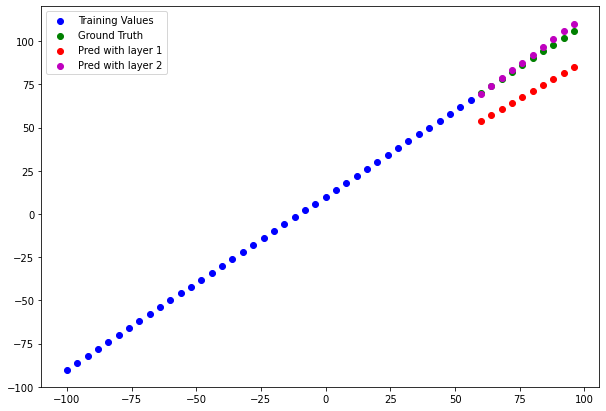

In [35]:
plt.figure(figsize= (10,7))

#plotting the training values

plt.scatter(X_train,Y_train,c = 'b',label = 'Training Values')

#plotting the true values

plt.scatter(X_test,Y_test,c = 'g',label ='Ground Truth')

#plotting the prdictions for model 7

plt.scatter(X_test,Yhats_1,c='r',label = 'Pred with layer 1')

# plotting the predictions for model 8

plt.scatter(X_test,Yhats_2,c='m',label = 'Pred with layer 2')

#plotting the predictions 3
#plt.scatter(X_test,Yhats_3,c = 'c',label = 'Predictions with epochs 500')

plt.legend();

In [36]:
Yhats_2

array([[ 69.4672  ],
       [ 73.985695],
       [ 78.50417 ],
       [ 83.02267 ],
       [ 87.541145],
       [ 92.05964 ],
       [ 96.57812 ],
       [101.0966  ],
       [105.61509 ],
       [110.133575]], dtype=float32)

In [37]:
Yhats_2 = model_8.predict(X_test)

In [38]:
mae_1 = tf.metrics.mae(Y_test,tf.squeeze(Yhats_1))
mae_2 = tf.metrics.mae(Y_test,tf.squeeze(Yhats_2))
mse_1 = tf.metrics.mse(Y_test,tf.squeeze(Yhats_1))
mse_2 = tf.metrics.mse(Y_test,tf.squeeze(Yhats_2))
mae_1,mae_2,mse_1,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.9098114>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.459232>)

In [39]:
# setting the seed 
tf.random.set_seed(42)

#Building the model with 1 layer
model_9 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1)
])

# compiling the model 
model_9.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
# fitting the model

model_9.fit(tf.expand_dims(X_train,axis = -1),Y_train,epochs = 500,verbose = 0 )

In [40]:
Yhats3 = model_9.predict(X_test)
Yhats3

array([[ 89.154274],
       [ 94.729515],
       [100.304756],
       [105.88    ],
       [111.45524 ],
       [117.03048 ],
       [122.60572 ],
       [128.18097 ],
       [133.75621 ],
       [139.33145 ]], dtype=float32)

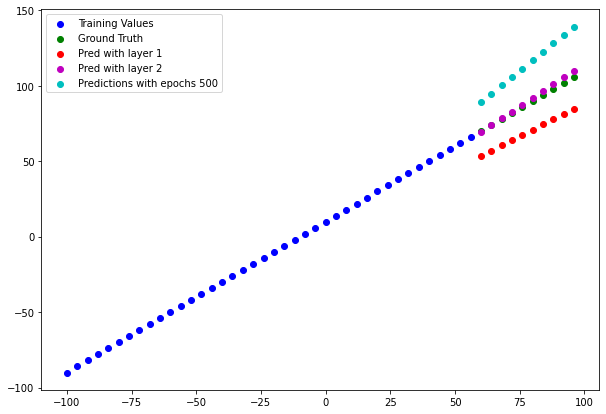

In [41]:
plt.figure(figsize= (10,7))

#plotting the training values

plt.scatter(X_train,Y_train,c = 'b',label = 'Training Values')

#plotting the true values

plt.scatter(X_test,Y_test,c = 'g',label ='Ground Truth')

#plotting the prdictions for model 7

plt.scatter(X_test,Yhats_1,c='r',label = 'Pred with layer 1')

# plotting the predictions for model 8

plt.scatter(X_test,Yhats_2,c='m',label = 'Pred with layer 2')

#plotting the predictions 3
plt.scatter(X_test,Yhats3,c = 'c',label = 'Predictions with epochs 500')

plt.legend();

we'll see ways to prevent training for too long later on

In [42]:
model_7.save('best_model_savedmodel_formatl')

INFO:tensorflow:Assets written to: best_model_savedmodel_formatl/assets


In [43]:
!ls best_model_savedmodel_formatl

assets	keras_metadata.pb  saved_model.pb  variables


In [44]:
model_7.save('best_model_hf5format.h5')

In [45]:
!ls best_model_hf5format.h5


best_model_hf5format.h5


In [46]:
loaded_save_model = tf.keras.models.load_model("best_model_savedmodel_formatl")
loaded_save_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
from google.colab import files
files.download("best_model_savedmodel_formatl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
import pandas as pd

In [49]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [50]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
insurance_one_hot = pd.get_dummies(insurance)

In [52]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [53]:
X = insurance_one_hot.drop('charges',axis = 1)
y = insurance_one_hot['charges']

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size =0.2,random_state = 42)

In [55]:
len(X_train),len(Y_train)

(1070, 1070)

In [56]:
len(X_test),len(Y_test)

(268, 268)

In [57]:
# set random state
tf.random.set_seed(42)

#building the model with 2 layers
insurance_model = tf.keras.Sequential([
                                        
                                       tf.keras.layers.Dense(100),
                                       tf.keras.layers.Dense(1)
                                       # output layer
])

#compiling the model 
insurance_model.compile( loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

# fitting the model

insurance_model.fit(X_train,Y_train,epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 8536.8818 - mae: 8536.8818
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7817.3003 - mae: 7817.3003
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7591.8726 - mae: 7591.8726
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7668.2153 - mae: 7668.2153
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 7673.0830 - mae: 7673.0830
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 7606.2773 - mae: 7606.2773
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7529.7305 - mae: 7529.7305
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7748.9668 - mae: 7748.9668
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7479.0654 - mae: 7479.0654
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7737.9727 - mae: 7737.9727

In [58]:
insurance_model.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8742.9365 - mae: 8742.9365


[8742.9365234375, 8742.9365234375]

In [59]:
#setting random seed
tf.random.set_seed(42)

#building  the model
insurance_model_1 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(10),
                     tf.keras.layers.Dense(1)
                     ])

#compiling the model 

insurance_model_1.compile(
    loss = tf.keras.losses.MAE,
    optimizer = tf.keras.optimizers.Adam(),
    metrics =["mae"]
)

# fitting the model 

history = insurance_model_1.fit(X_train,Y_train,epochs = 100,verbose = 0)


AttributeError: ignored

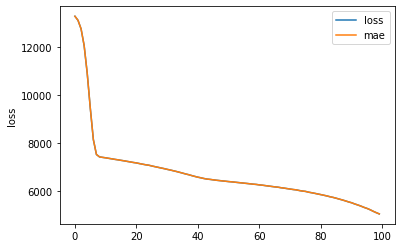

In [61]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlablel("epochs");

In [62]:
import matplotlib.pyplot as plt

In [63]:
history_2 =insurance_model_1.fit(X_train,Y_train,epochs=100,verbose=0)

In [64]:
insurance_model_1.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3494.7285 - mae: 3494.7285


[3494.728515625, 3494.728515625]

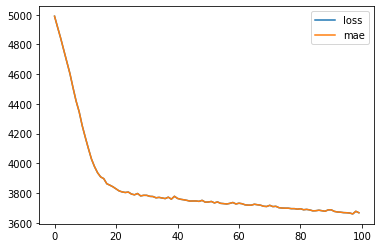

In [65]:
pd.DataFrame(history_2.history).plot()

In [66]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 we're going to use a few classes from Scikit-Learn:
* [`make_column_transformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html) - build a multi-step data preprocessing function for the folllowing trnasformations:
  * [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) - make sure all numerical columns are normalized (between 0 and 1).
  * [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) - one hot encode the non-numerical columns.

Let's see them in action.

In [67]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder

In [81]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [74]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [76]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [77]:
X_train.shape,X_train_normal.shape

((1070, 6), (1070, 11))

In [84]:
#set seed
tf.random.set_seed(42)

#Building the model
insurance_model_normal = tf.keras.Sequential([
                                             
                                              tf.keras.layers.Dense(100),
                                              tf.keras.layers.Dense(10),
                                              tf.keras.layers.Dense(1)
])

#lets compile the model

insurance_model_normal.compile(
                                loss = tf.keras.losses.MAE,
                               optimizer = tf.keras.optimizers.Adam(),
                               metrics =["mae"]
)

# lets fit the model

insurance_model_normal.fit(X_train_normal,y_train,epochs =200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 11925.96